In [ ]:
# default_exp edaguide

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import csv
import sys

from IPython.display import clear_output, display
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
input_file = '../data/FIFA 2018 Statistics.csv'
output_file = '../data/labels.csv'
df = pd.read_csv(input_file)
target_var = 'Man of the Match'
features = ['Goal Scored', 'Ball Possession %', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides', 
           'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)', 'Fouls Committed', 
            'Yellow Card', 'Red', '1st Goal']

In [ ]:
class Labeler:
    def __init__(self, df, target_var, output_path, features=None):
        self.df = df
        self.features = features
        self.target_var = target_var
        self.output_path = output_path
        
    def _validate_input(self):
        while True:
            label = input('Enter option: ')
            if label == 'save' or label in self._labels:
                break
            else:
                continue
        return label
    
    def __call__(self):
        while self._count <= self._n:
            clear_output(wait=True)
            print(f"Valid options: {', '.join(self._labels)}, save")
            print(f"Total samples labeled: {self._count}/{self._n}")
            self._row = self._df.sample(1, replace=False)
            display(self._row[self.features])
            self._label = self._validate_input()
            if self._label == 'save':
                break
            self._row['manual_label'] = self._label
            self._label_df = self._label_df.append(self._row.copy())
            self._count += 1
    
    def __enter__(self):
        self._labels = self.df[self.target_var].unique()
        self._mapping = {}
        self._n = len(self.df)
        self._count = 0
        self._df = self.df[self.features + [self.target_var]].copy() if self.features else self.df.copy()
        self._label_df = pd.DataFrame(columns=list(self._df.columns) + ['manual_label'])
        for ix, label in enumerate(self._labels):
            self._mapping[ix] = label
        return self
    
    def __exit__(self, exc_type, exc_val, exc_tb):
        self._label_df['manual_label'].replace(self._mapping, inplace=True)
        cm = confusion_matrix(self._label_df[self.target_var],
                              self._label_df['manual_label'],
                              labels=self._labels)
        fig = plt.figure()
        ax= plt.subplot()
        sns.heatmap(cm, annot=True, ax = ax, cmap=plt.cm.Blues)
        ax.set_xlabel('Predicted labels');
        ax.set_ylabel('True labels'); 
        ax.set_title('Confusion Matrix'); 
        ax.xaxis.set_ticklabels(self._labels); 
        ax.yaxis.set_ticklabels(self._labels);
        
        if self.output_path.endswith('.csv'):
            print(f"Writing csv to {self.output_path}")
            self._label_df.to_csv(self.output_path)

In [ ]:
labeler = Labeler(df, target_var, output_file, features=features)

Valid options: Yes, No, save
Total samples labeled: 8/128


,Goal Scored,Ball Possession %,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Red,1st Goal
112,0,42,4,6,1,4,0,15,0,67,322,103,17,2,0,NaN


Enter option: save
Writing csv to ../data/labels.csv


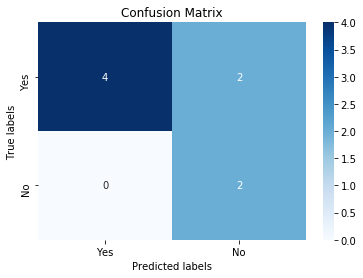

In [ ]:
with labeler as l:
    l()